# Gradient Boosting - Caso Titanic

En este notebook, utilizaremos Gradient Boosting para entrenar un algoritmo de clasificación que permita establecer un modelo que prediga los sobrevivientes del dataset Titanic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carga de Datos y Análisis Exploratorio

In [4]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Valores perdidos

La cabina no aporta mucho en el análisis, pero la edad es una variable importante para predecir si una persona sobrevivió o no a la trajedia. A continuación, una forma de "visualizar" los valores perdidos.

Haremos una imputación de la edad del pasajero en función del promedio de edad de la clase en la que viajaba.

In [11]:
edades = df.groupby('Pclass')['Age'].mean().round()
edades

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64

In [13]:
# creamos una funcion que imputa la edad en caso de estar nula
def imputar_edad(cols):
    edad = edad = cols.iloc[0]
    pclass = pclass = cols.iloc[1]
    if(pd.isnull(edad)):
        if(pclass==1):
            return 38
        if(pclass==2):
            return 30
        if(pclass==3):
            return 25
    else:
        return edad

In [15]:
df['Age'] = df[['Age','Pclass']].apply(imputar_edad, axis=1)

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Formulación del modelo

En esta sección seleccionaremos las variables que incorporaremos en la matriz de predictores "X" y en el vector de resultados "y", ya que no todas las columnas son de utilidad.

In [20]:
X = df[['Age','Sex','Fare']]
y = df['Survived']

In [22]:
X = pd.get_dummies(X, drop_first=True)

In [24]:
X.head(2)

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False


### Validación Cruzada

In [27]:
from sklearn.model_selection import train_test_split

Nótese que si utilizamos random_state 0 y 41, obtenemos un performance distinto para cada caso

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  # 41, 0

### Modelamiento con GradientBoosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
clf = GradientBoostingClassifier(random_state=0)

In [37]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(random_state=0)

In [39]:
# score en set de entrenamiento
clf.score(X_train,y_train)

0.8778089887640449

In [41]:
# score en set de test
clf.score(X_test,y_test)

0.8268156424581006

## Hiperparámetros

In [44]:
clf = GradientBoostingClassifier(
                random_state = 0,
                n_estimators=150,
                learning_rate=0.01,
                max_depth=8,
                subsample=0.75)

In [46]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=150,
                           random_state=0, subsample=0.75)

In [48]:
# score en set de entrenamiento
clf.score(X_train,y_train)

0.9213483146067416

In [50]:
# score en set de test
clf.score(X_test,y_test)

0.8324022346368715

In [52]:
importance_gb = clf.feature_importances_

In [54]:
def plot_feature_importance(importances, feature_names, model_name):
    indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} Feature Importances")
    plt.bar(range(len(importances)), importances[indices], color="r", align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
    plt.xlim([-1, len(importances)])
    plt.tight_layout()
    plt.show()

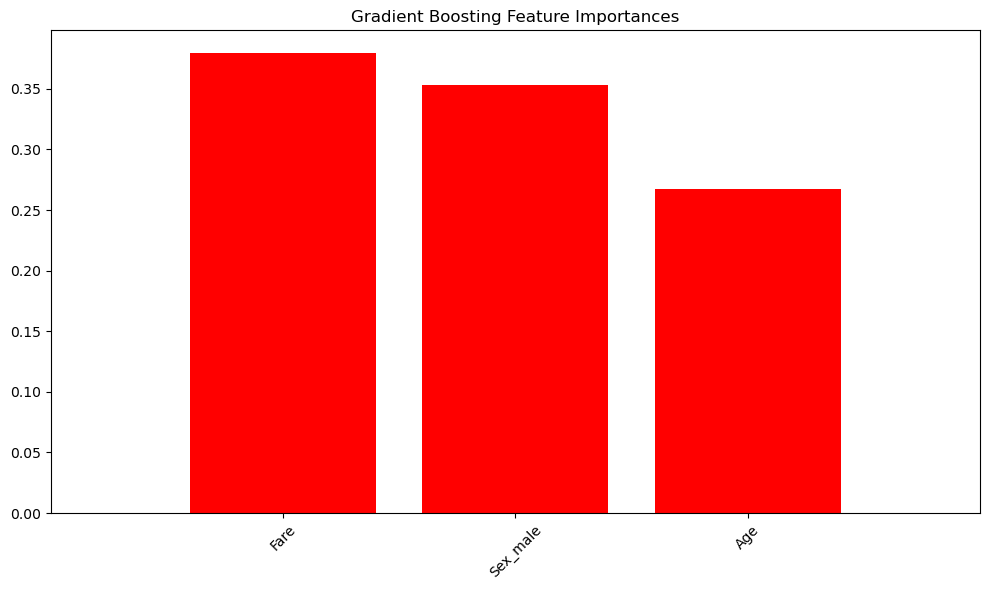

In [56]:
plot_feature_importance(importance_gb, X_train.columns, "Gradient Boosting")